#Environment

In [13]:
import pygame
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output
from IPython.display import clear_output

# Initialize Pygame
pygame.init()

# Set up the window
WINDOW_WIDTH = 400
WINDOW_HEIGHT = 1000
window = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
pygame.display.set_caption("Mobile Robot Path Planning")

# Define colors
MOUNTAIN_COLOR = (139, 69, 19)
FOREST_COLOR = (34, 139, 34)
SNOW_COLOR = (255, 250, 250)

# Define environment sections
class EnvironmentSection:
    def __init__(self, x, y, width, height, color, name):
        self.rect = pygame.Rect(x, y, width, height)
        self.color = color
        self.name = name

    def draw(self):
        pygame.draw.rect(window, self.color, self.rect)
        # font = pygame.font.Font(None, 36)
        # text = font.render(self.name, True, (0, 0, 0))
        # text_rect = text.get_rect(center=self.rect.center)
        # window.blit(text, text_rect)

# Create the environment sections
mountain = EnvironmentSection(0, 0, WINDOW_WIDTH, WINDOW_HEIGHT // 3, MOUNTAIN_COLOR, "Mountain")
forest = EnvironmentSection(0, WINDOW_HEIGHT // 3, WINDOW_WIDTH, WINDOW_HEIGHT // 3, FOREST_COLOR, "Forest")
tundra = EnvironmentSection(0, 2 * WINDOW_HEIGHT // 3, WINDOW_WIDTH, WINDOW_HEIGHT // 3, SNOW_COLOR, "Tundra")

# Define obstacles
class Obstacle:
    def __init__(self, x, y, width, height, color, name):
        self.rect = pygame.Rect(x, y, width, height)
        self.color = color
        self.name = name

    def draw(self):
        pygame.draw.rect(window, self.color, self.rect)
        # font = pygame.font.Font(None, 24)
        # text = font.render(self.name, True, (0, 0, 0))
        # text_rect = text.get_rect(center=self.rect.center)
        # window.blit(text, text_rect)

# Create obstacles for each environment section
mountain_obstacles = [
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(50, WINDOW_HEIGHT // 3 - 50), 50, 50, (128, 128, 128), "Mountain Obstacle 1"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(50, WINDOW_HEIGHT // 3 - 50), 75, 75, (128, 128, 128), "Mountain Obstacle 2"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(50, WINDOW_HEIGHT // 3 - 50), 100, 100, (128, 128, 128), "Mountain Obstacle 3")
]

forest_obstacles = [
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(WINDOW_HEIGHT // 3 + 50, 2 * WINDOW_HEIGHT // 3 - 50), 30, 30, (34, 139, 34), "Forest Obstacle 1"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(WINDOW_HEIGHT // 3 + 50, 2 * WINDOW_HEIGHT // 3 - 50), 40, 40, (34, 139, 34), "Forest Obstacle 2"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(WINDOW_HEIGHT // 3 + 50, 2 * WINDOW_HEIGHT // 3 - 50), 50, 50, (34, 139, 34), "Forest Obstacle 3")
]

tundra_obstacles = [
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(2 * WINDOW_HEIGHT // 3 + 50, WINDOW_HEIGHT - 50), 20, 20, (211, 211, 211), "Tundra Obstacle 1"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(2 * WINDOW_HEIGHT // 3 + 50, WINDOW_HEIGHT - 50), 30, 30, (211, 211, 211), "Tundra Obstacle 2"),
    Obstacle(random.randint(50, WINDOW_WIDTH - 50), random.randint(2 * WINDOW_HEIGHT // 3 + 50, WINDOW_HEIGHT - 50), 40, 40, (211, 211, 211), "Tundra Obstacle 3")
]

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the window
    window.fill((255, 255, 255))

    # Draw the environment sections
    mountain.draw()
    forest.draw()
    tundra.draw()

    # Draw the obstacles
    for obstacle in mountain_obstacles:
        obstacle.draw()
    for obstacle in forest_obstacles:
        obstacle.draw()
    for obstacle in tundra_obstacles:
        obstacle.draw()

    # Update the display
    pygame.display.flip()

    # Display the Pygame window using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(pygame.surfarray.array3d(window))
    plt.axis('off')
    plt.show()
    clear_output(wait=True)

# Quit Pygame
pygame.quit()

KeyboardInterrupt: 

<Figure size 800x600 with 0 Axes>

In [5]:
import numpy as np
from gym.spaces import Box, Discrete

class MobileRobotEnv:
    def __init__(self):
        # Initialize the environment state
        self.agent_x = 100
        self.agent_y = 100
        self.environment_section = "mountain"

        # Define the observation and action spaces
        self.observation_space = Box(low=np.array([0, 0, 0]), high=np.array([WINDOW_WIDTH, WINDOW_HEIGHT, 2]), dtype=np.float32)
        self.action_space = Discrete(4)  # up, down, left, right

    def step(self, action):
        # Update the agent's position based on the action
        if action == 0:  # up
            self.agent_y = max(self.agent_y - 10, 50)
        elif action == 1:  # down
            self.agent_y = min(self.agent_y + 10, WINDOW_HEIGHT - 50)
        elif action == 2:  # left
            self.agent_x = max(self.agent_x - 10, 50)
        elif action == 3:  # right
            self.agent_x = min(self.agent_x + 10, WINDOW_WIDTH - 50)

        # Determine the new environment section
        if self.agent_y < WINDOW_HEIGHT // 3:
            self.environment_section = "mountain"
            self.environment_id = 1
        elif self.agent_y < 2 * WINDOW_HEIGHT // 3:
            self.environment_section = "forest"
            self.environment_id = 2
        else:
            self.environment_section = "tundra"
            self.environment_id = 3

        # Calculate the reward based on the agent's position and the environment section
        reward = self.calculate_reward()

        # Check if the episode has ended
        done = self.check_terminal_state()

        # Return the new state, reward, and done flag
        return [(self.agent_x, self.agent_y, self.environment_section), reward, done]

    def reset(self):
        # Reset the agent's position to the starting point
        self.agent_x = 100
        self.agent_y = 100
        self.environment_section = "mountain"
        return (self.agent_x, self.agent_y, self.environment_id)

    def calculate_reward(self):
        # Implement your reward function here
        # For example, you can reward the agent for staying in the forest section
        if self.environment_section == "forest":
            return 1
        else:
            return -1

    def check_terminal_state(self):
        # Implement your terminal state condition here
        # For example, you can consider the episode ended when the agent falls off the environment
        if self.agent_y < 50 or self.agent_y > WINDOW_HEIGHT - 50:
            return True
        else:
            return False

In [6]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network architecture
class PolicyNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        return torch.softmax(self.fc2(x), dim=1)

# PPO Agent
class PPOAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.99, clip_ratio=0.2):
        self.policy_network = PolicyNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_ratio = clip_ratio

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.policy_network(state)
        action = probs.multinomial(num_samples=1).item()
        return action

    def update(self, states, actions, rewards, old_log_probs):
        discounted_rewards = []
        R = 0
        for reward in reversed(rewards):
            R = reward + self.gamma * R
            discounted_rewards.insert(0, R)
        discounted_rewards = torch.tensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-5)

        log_probs = torch.log(self.policy_network(torch.from_numpy(states).float())[range(len(actions)), actions])
        ratio = torch.exp(log_probs - old_log_probs)
        advantage = discounted_rewards
        surr1 = ratio * advantage
        surr2 = torch.clamp(ratio, 1 - self.clip_ratio, 1 + self.clip_ratio) * advantage
        loss = -torch.min(surr1, surr2).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.policy_network = PolicyNetwork(state_size, action_size)
        self.target_network = PolicyNetwork(state_size, action_size)
        self.target_network.load_state_dict(self.policy_network.state_dict())
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=lr)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        if np.random.rand() < self.epsilon:
            return env.action_space.sample()
        else:
            q_values = self.policy_network(state)
            return q_values.argmax().item()

    def update(self, states, actions, rewards, next_states, dones):
        target_q_values = self.target_network(torch.from_numpy(next_states).float())
        target_q_values = rewards + self.gamma * (1 - dones) * target_q_values.max(1)[0].unsqueeze(1)
        q_values = self.policy_network(torch.from_numpy(states).float())[range(len(actions)), actions]
        loss = nn.MSELoss()(q_values, target_q_values)

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Policy Gradient Agent
class PolicyGradientAgent:
    def __init__(self, state_size, action_size, lr=1e-3, gamma=0.99):
        self.policy_network = PolicyNetwork(state_size, action_size)
        self.optimizer = optim.Adam(self.policy_network.parameters(), lr=lr)
        self.gamma = gamma

    def select_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.policy_network(state)
        action = probs.multinomial(num_samples=1).item()
        return action

    def update(self, states, actions, rewards):
        discounted_rewards = []
        R = 0
        for reward in reversed(rewards):
            R = reward + self.gamma * R
            discounted_rewards.insert(0, R)
        discounted_rewards = torch.tensor(discounted_rewards)
        discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-5)

        log_probs = torch.log(self.policy_network(torch.from_numpy(states).float())[range(len(actions)), actions])
        loss = -log_probs * discounted_rewards.detach()
        loss = loss.mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()


In [7]:
env = MobileRobotEnv()
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
ppo_agent = PPOAgent(state_size, action_size)
pg_agent = PolicyGradientAgent(state_size, action_size)
dqn_agent = DQNAgent(state_size, action_size)

/usr/local/lib/python3.10/dist-packages/gym/spaces/box.py:128: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [8]:
max_episodes=1000
max_steps=100

rewards_all_episodes = []

for episode in range(max_episodes):
  state = env.reset()
  episode_rewards = 0
  done = False
  steps = 0

  while not done and steps < max_steps:

      action1 = ppo_agent.select_action(state)
      action2 = pg_agent.select_action(state)
      action3 = dqn_agent.select_action(state)
      next_state1, reward1, done1, _ = env.step(action1)
      next_state2, reward2, done2, _ = env.step(action2)
      next_state3, reward3, done3, _ = env.step(action3)
      episode_rewards += reward

      agent.update([reward], [state], [action], [done])

      state = next_state
      steps += 1

  rewards_all_episodes.append(episode_rewards)
  print(f"Episode: {episode+1}, Reward: {episode_rewards}")



# Usage
env = MobileRobotEnv()
state_size = env.state_size
action_size = env.action_size

agent = PPOAgent(state_size, action_size)
rewards = train(env, agent)

AttributeError: 'MobileRobotEnv' object has no attribute 'environment_id'

(275, 183, 3)


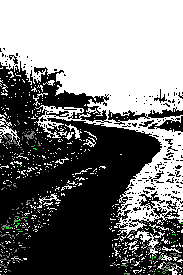

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/images.jfif')
print(image.shape)

if image is None:
    print("Failed to load the image.")
    exit()

# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for snow, grass, and road
snow_lower = np.array([0, 0, 200])
snow_upper = np.array([180, 50, 255])

grass_lower = np.array([30, 50, 20])
grass_upper = np.array([90, 255, 100])

road_lower = np.array([0, 0, 0])
road_upper = np.array([180, 50, 100])

# Create masks for each element
snow_mask = cv2.inRange(hsv_image, snow_lower, snow_upper)
grass_mask = cv2.inRange(hsv_image, grass_lower, grass_upper)
road_mask = cv2.inRange(hsv_image, road_lower, road_upper)

# Combine the masks to create a segmented image
segmented_image = np.zeros_like(image)
segmented_image[snow_mask > 0] = (255, 255, 255)  # White for snow
segmented_image[grass_mask > 0] = (0, 255, 0)     # Green for grass
segmented_image[road_mask > 0] = (128, 128, 128)  # Gray for road

# Display the segmented image
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [10]:
import cv2
import torch
import detectron2
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow

# Load the pre-trained Mask R-CNN model
cfg = get_cfg()
cfg.merge_from_file("detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# Load the image
image = cv2.imread('/content/images.jfif')

# Make a prediction
outputs = predictor(image)

# Extract the segmentation masks
snow_mask = outputs["instances"].pred_masks[:, 0].cpu().numpy()
grass_mask = outputs["instances"].pred_masks[:, 1].cpu().numpy()
road_mask = outputs["instances"].pred_masks[:, 2].cpu().numpy()

# Visualize the segmentation masks
segmented_image = image.copy()
segmented_image[snow_mask > 0.5] = (255, 255, 255)  # White for snow
segmented_image[grass_mask > 0.5] = (0, 255, 0)     # Green for grass
segmented_image[road_mask > 0.5] = (128, 128, 128)  # Gray for road

# Display the segmented image
cv2_imshow('Segmented Image', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'detectron2'